In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [4]:
X,y = datasets.load_diabetes(return_X_y=True)

In [5]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
class RidgeRegression:
    def __init__(self, learning_rate,alpha,num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha  # Regularization strength (alpha)
        self.coefficients = None
        self.intercept = None
        self.loss_history = []

    def fit(self, X, y):
        # Initialize coefficients and intercept
        num_features = X.shape[1]
        self.coefficients = np.zeros(num_features)
        self.intercept = 0

        N = len(y)

        for i in range(self.num_iterations):
            # Calculate predicted values
            y_pred = np.dot(X, self.coefficients) + self.intercept

            # Calculate the loss (mean squared error) with L2 regularization
            loss = mean_squared_error(y, y_pred) + (self.alpha * np.sum(self.coefficients ** 2))
            self.loss_history.append(loss)

            # Calculate the gradients for coefficients and intercept with L2 regularization
            gradient_coeffs = (-2/N) * np.dot(X.T, (y - y_pred)) + 2 * self.alpha * self.coefficients
            gradient_intercept = (-2/N) * np.sum(y - y_pred)

            # Update coefficients and intercept using gradients
            self.coefficients = self.coefficients - self.learning_rate * gradient_coeffs
            self.intercept = self.intercept - self.learning_rate * gradient_intercept
        
        
            
    def predict(self,X):
        prediction = np.dot(self.coefficients,X.T) + self.intercept
        return prediction
                    

In [46]:
learning_rates = [0.00001,2, 4, 6]
losses  = {}
for lr in learning_rates:
    custom_model = RidgeRegression(learning_rate=0.01, num_iterations=500, alpha=1.0)
    custom_model.fit(X_train, y_train)
    losses[lr] = custom_model.loss_history

In [43]:
print(losses)

{1e-05: [29711.32294617564, 28363.657465433716, 27125.57648572047, 25982.59326647845, 24922.672037476957, 23935.779306000586, 23013.519191167114, 22148.83693711027, 21335.777753571332, 20569.290561982005, 19845.068194817773, 19159.41719293558, 18509.151640368946, 17891.50652585231, 17304.06697156477, 16744.710359816014, 16211.55894811858, 15702.94101700542, 15217.35896308377, 14753.463048400054, 14310.029759384577, 13885.94392511749, 13480.183904056403, 13091.809277702658, 12719.950594641075, 12363.800793574883, 12022.60800313005, 11695.66947234949, 11382.326431394462, 11081.959719008551, 10793.986043394018, 10517.854767610354, 10253.045130492375, 9999.063830261339, 9755.442911165832, 9521.737904206218, 9297.52618172648, 9082.405492773687, 8875.99265193013, 8677.922359062057, 8487.846131301283, 8305.431331743077, 8130.360281937405, 7962.329447376925, 7801.0486869312, 7646.240558612347, 7497.639675240074, 7354.99210455043, 7218.054809099953, 7086.595121986575, 6960.390254964928, 6839.22

c:\Users\Gaurav\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Gaurav\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


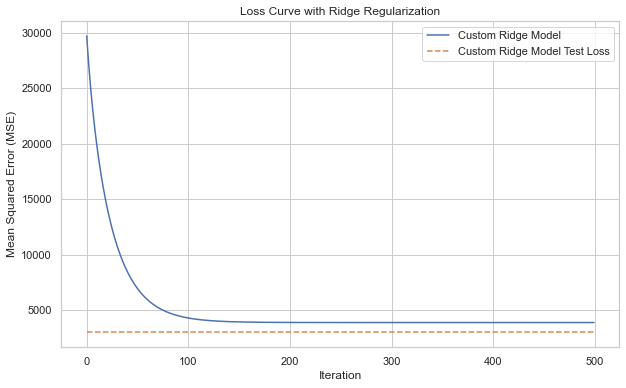

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(range(len(custom_model.loss_history)), custom_model.loss_history, label="Custom Ridge Model")
sns.lineplot(range(len(custom_model.loss_history)), [mean_squared_error(y_test, custom_model.predict(X_test))] * len(custom_model.loss_history), label="Custom Ridge Model Test Loss", linestyle="--")
#sns.lineplot(range(len(custom_ridge_model.loss_history)), [mean_squared_error(y_test, sklearn_ridge_model.predict(X_test))] * len(custom_ridge_model.loss_history), label="scikit-learn Ridge Model Test Loss", linestyle="--")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.title("Loss Curve with Ridge Regularization")
plt.show()

c:\Users\Gaurav\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Gaurav\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Gaurav\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

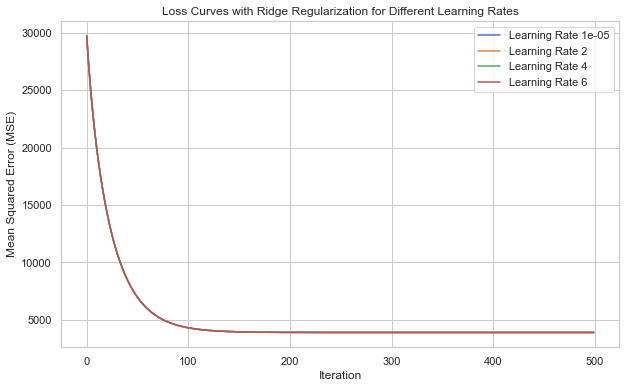

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for learning_rate, loss_curve in losses.items():
    sns.lineplot(range(len(loss_curve)), loss_curve, label=f"Learning Rate {learning_rate}")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.title("Loss Curves with Ridge Regularization for Different Learning Rates")
plt.show()